<a href="https://colab.research.google.com/github/maclandrol/cours-ia-med/blob/master/02_Analyse_Donnees_BioMed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Python : Outils pour l'Analyse Médicale

**Enseignant:** Emmanuel Noutahi, PhD

---

**Objectif:** Analyser un vrai dataset médical pour prédire les maladies cardiaques.

**Ce que vous allez apprendre :**
- Charger et explorer des données médicales réelles
- Identifier les facteurs de risque cardiovasculaire
- Créer des visualisations médicales
- Construire un modèle prédictif simple

**Dataset:** Cleveland Heart Disease (303 patients, 14 caractéristiques cliniques)

## Configuration et Installation

In [1]:
# Installation des bibliothèques nécessaires pour Google Colab
! pip install pandas numpy matplotlib seaborn scikit-learn -q

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Plotting configuration
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Chargement des Données

### Dataset

Le dataset: Heart Disease contient 13 attributs et une variable cible. Elle comprend 8 variables nominales et 5 variables numériques. La description détaillée de ces caractéristiques est la suivante :

- **Age** : Âge des patients en années (Numérique)
- **Sex** : Sexe (Homme : 1 ; Femme : 0) (Nominal)
- **cp** (chest pain): Type de douleur thoracique ressentie par le patient, classée en 4 catégories :
  - 1 : angine typique,
  - 2 : angine atypique,
  - 3 : douleur non angineuse,
  - 4 : asymptomatique (Nominal)
- **trestbps** : Pression artérielle au repos en mmHg (Numérique)
- **chol** : Cholestérol sérique en mg/dl (Numérique)
- **fbs** : Glycémie à jeun > 120 mg/dl représentée par 1 si vrai et 0 si faux (Nominal)
- **restecg** : Résultat de l’électrocardiogramme au repos, représenté par 3 valeurs distinctes :
  - 0 : normal ;
  - 1 : anomalie de l’onde ST-T (inversion de l’onde T et/ou élévation ou dépression du segment ST > 0,05 mV) ;
  - 2 : hypertrophie ventriculaire gauche probable ou certaine selon les critères d’Estes (Nominal)
- **thalach** : Fréquence cardiaque maximale atteinte (Numérique)
- **exang** : Angine induite par l’exercice
  - 0 : non ;
  - 1 : oui (Nominal)
- **oldpeak** : Dépression du segment ST induite par l’exercice par rapport à l’état de repos (Numérique)
- **slope** : Pente du segment ST lors de l’effort maximal :
  - 1 : ascendante ;
  - 2 : plate ;
  - 3 : descendante (Nominal)
- **ca** : Nombre de vaisseaux principaux colorés par fluoroscopie (0–3) (Nominal)
- **thal** : Trouble sanguin thalassémie :
  - 3 = normal;
  - 6 = anormal fixe (absence de flux sanguin dans une partie du cœur) ;
  - 7 = anormal réversible (flux sanguin présent mais anormal) (Nominal)
- **diagnostic** : Diagnostique de maladie cardiaque,  variable cible à prédire :
  - `>=1` signifie que le patient souffre d’une maladie cardiaque et
  - 0 qu’il est normal.


In [4]:
# Imports
import pandas as pd
import numpy as np

# Charger le dataset Heart Disease depuis UCI Repository
# URL directe vers les données
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Noms des colonnes selon la documentation UCI
column_names = [
    'age',        # Âge
    'sex',        # Sexe (1 = masculin, 0 = féminin)
    'cp',         # Type de douleur thoracique (0-3)
    'trestbps',   # Pression artérielle au repos (mmHg)
    'chol',       # Cholestérol sérique (mg/dl)
    'fbs',        # Glycémie à jeun >120 mg/dl (0=Non, 1=Oui)
    'restecg',    # Résultats ECG au repos (0-2)
    'thalach',    # Fréquence cardiaque maximale (bpm)
    'exang',      # Angine d'effort (0=Non, 1=Oui)'
    'oldpeak',    # Dépression ST (mm)
    'slope',      # Pente du segment ST (0-2)
    'ca',         # Nombre de vaisseaux colorés (0-3)
    'thal',       # Type thalassémie (0-3)
    'label'      # Diagnostic (0 = pas de maladie, >0 = maladie cardiaque)
]
# Charger les données
df = pd.read_csv(url, names=column_names, na_values='?')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Dictionnaire de description des colonnes
description_dict = {
    'age': "Âge du patient",
    'sex': "Sexe (1 = masculin, 0 = féminin)",
    'cp': "Type de douleur thoracique (0: typique angine, 1: atypique angine, 2: douleur non-angineuse, 3: asymptomatique)",
    'trestbps': "Pression artérielle au repos (mmHg)",
    'chol': "Cholestérol sérique (mg/dl)",
    'fbs': "Glycémie à jeun > 120 mg/dl (1 = oui, 0 = non)",
    'restecg': "Résultats ECG au repos (0: normal, 1: anomalie onde ST-T, 2: hypertrophie ventriculaire probable)",
    'thalach': "Fréquence cardiaque maximale atteinte (bpm)",
    'exang': "Angine d'effort (1 = oui, 0 = non)",
    'oldpeak': "Dépression ST induite par l'effort par rapport au repos",
    'slope': "Pente du segment ST lors de l’effort maximal (1: ascendante, 2: plate, 3: descendante)",
    'ca': "Nombre de vaisseaux principaux colorés par fluoroscopie (0–3)",
    'thal': "Type de thalassémie (3 = normal, 6 = anormal fixe, 7 = anormal réversible)",
    'label': "Diagnostic original UCI (0 = absence de maladie, 1-4 = types de maladie cardiaque)",
    'diagnostic': "Diagnostique simple (Sain ou Malade)",
    'classe': "Variable cible binaire (0 = Sain, 1 = Malade pour la classification)"
}

In [7]:
# Informations générales sur le dataset
print("INFORMATIONS GÉNÉRALES:")
print(f"- Nombre total de patients: {len(df)}")
print(f"- Nombre de variables: {df.shape[1]}")
print(f"- Valeurs manquantes: {df.isnull().sum().sum()}")

INFORMATIONS GÉNÉRALES:
- Nombre total de patients: 303
- Nombre de variables: 14
- Valeurs manquantes: 6


In [8]:
# Ajout d'une colonne "diagnostic" simple : "Sain" ou "Malade"
diagnostic_values = []
for value in df["label"]:
    if value > 0:
        diagnostic_values.append("Malade")
    else:
        diagnostic_values.append("Sain")
df["diagnostic"] = diagnostic_values

# metter une classe "Malade" == 1, "Sain" = 0 pour la classification plus tard
df["classe"] = (df["diagnostic"] == "Malade").astype(int)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,diagnostic,classe
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Sain,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Malade,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Malade,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Sain,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Sain,0


## Exploration des Données

In [ ]:
# Verification de la distribution des patients
df.groupby(["diagnostic", "label"]).count()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
diagnostic label                                                                
Malade     1       55   55   55        55    55   55       55       55     55   
           2       36   36   36        36    36   36       36       36     36   
           3       35   35   35        35    35   35       35       35     35   
           4       13   13   13        13    13   13       13       13     13   
Sain       0      164  164  164       164   164  164      164      164    164   

                  oldpeak  slope   ca  thal  classe  
diagnostic label                                     
Malade     1           55     55   54    55      55  
           2           36     36   36    35      36  
           3           35     35   35    35      35  
           4           13     13   13    13      13  
Sain       0          164    164  161   163     164

In [ ]:
# Répartition par sexe
print("RÉPARTITION PAR SEXE:")
sex_counts = df["sex"].value_counts()
print(sex_counts)

RÉPARTITION PAR SEXE:
sex
1.0    206
0.0     97
Name: count, dtype: int64


In [ ]:
pct_femmes = (sex_counts[0] / len(df)) * 100
pct_hommes = (sex_counts[1] / len(df)) * 100
print(f"- Femmes: {pct_femmes:.1f}%")
print(f"-  Hommes: {pct_hommes:.1f}%")

- Femmes: 32.0%
-  Hommes: 68.0%


In [ ]:
# Statistiques d'âge
print("STATISTIQUES D'ÂGE:")
df["age"].describe()

STATISTIQUES D'ÂGE:


count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

## Visualisations des Données

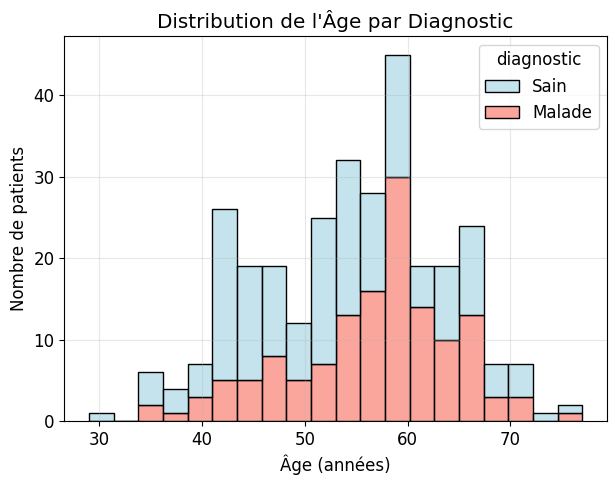

In [ ]:
# 1. Distribution de l'âge par diagnostic

plt.figure(figsize=(7, 5))
palette = {"Sain": 'lightblue', "Malade": 'salmon'}

ax = sns.histplot(
    data=df,
    x="age",
    hue="diagnostic",
    bins=20,
    alpha=0.7,
    multiple="stack", # "dodge"
    palette=palette,
)
ax.set_title("Distribution de l'Âge par Diagnostic")
ax.set_xlabel("Âge (années)")
ax.set_ylabel("Nombre de patients")

plt.grid(True, alpha=0.3)
plt.show()

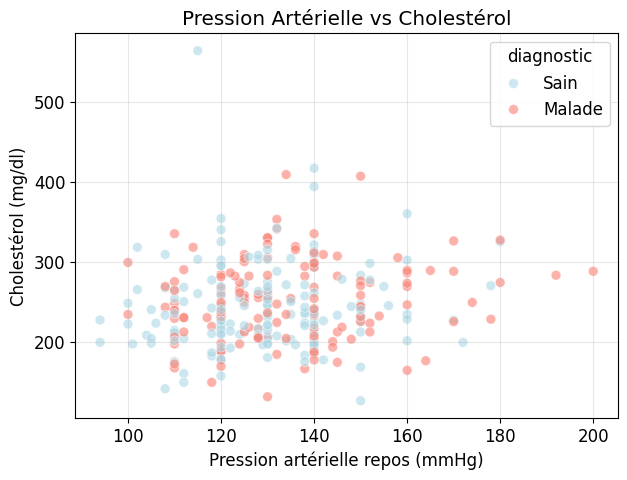

In [ ]:
# 2. Pression artérielle vs Cholestérol

plt.figure(figsize=(7, 5))
ax = sns.scatterplot(
    data=df,
    x="trestbps",
    y="chol",
    hue="diagnostic",
    palette=palette,
    alpha=0.6,
    s=50,
)
ax.set_title("Pression Artérielle vs Cholestérol")
ax.set_xlabel("Pression artérielle repos (mmHg)")
ax.set_ylabel("Cholestérol (mg/dl)")
ax.grid(True, alpha=0.3)

plt.show()

In [ ]:
# 3. Pourcentage de maladie par sexe (avec seaborn)
dist_par_sex = pd.crosstab(df["sex"], df["diagnostic"], normalize="index") * 100
dist_par_sex = dist_par_sex.reset_index().melt(
    id_vars="sex", var_name="diagnostic", value_name="Pourcentage"
)
dist_par_sex

,sex,diagnostic,Pourcentage
0,0.0,Malade,25.773196
1,1.0,Malade,55.339806
2,0.0,Sain,74.226804
3,1.0,Sain,44.660194


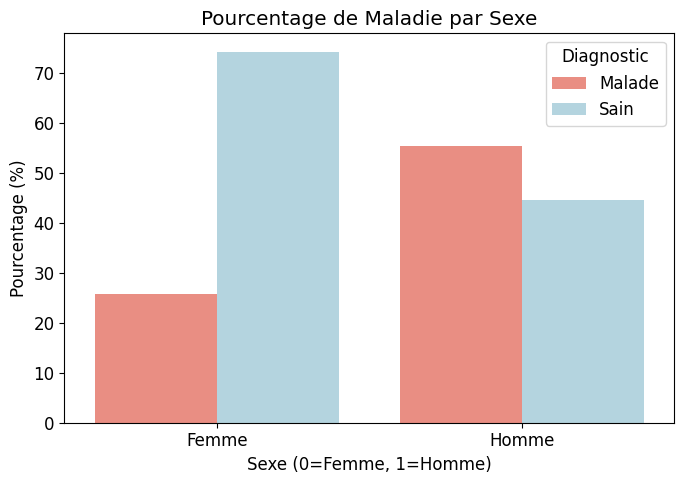

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=dist_par_sex, x="sex", y="Pourcentage", hue="diagnostic", palette=palette
)
ax.set_title("Pourcentage de Maladie par Sexe")
ax.set_xlabel("Sexe (0=Femme, 1=Homme)")
ax.set_ylabel("Pourcentage (%)")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Femme', 'Homme'])
plt.legend(title='Diagnostic')
plt.tight_layout()
plt.show()

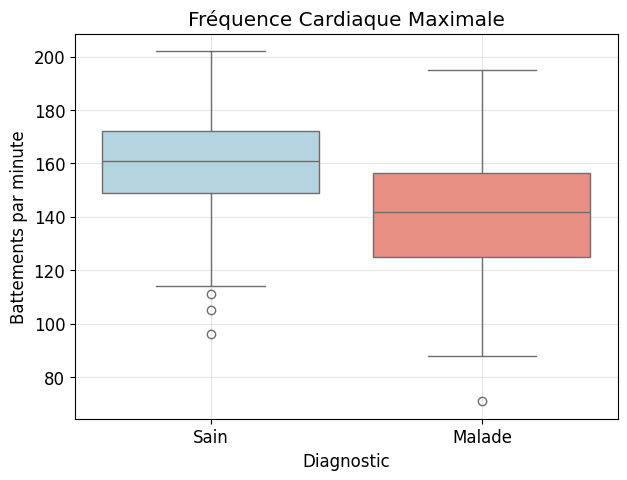

In [ ]:
# 4. Fréquence cardiaque maximale (avec seaborn)
plt.figure(figsize=(7,5))
ax = sns.boxplot(
    data=df,
    x='diagnostic',
    y='thalach',
    palette=palette
)
ax.set_title('Fréquence Cardiaque Maximale')
ax.set_ylabel('Battements par minute')
ax.set_xlabel('Diagnostic')
ax.grid(True, alpha=0.3)
plt.show()


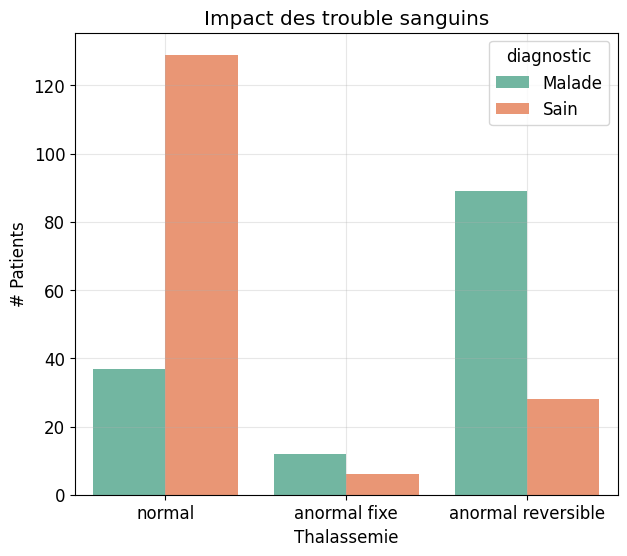

In [ ]:
# 4. Fréquence cardiaque maximale (avec seaborn)
plt.figure(figsize=(7, 6))
ax = sns.countplot(
    data=df,
    x="thal",
    hue="diagnostic",
    palette="Set2",

)
ax.set_title("Impact des trouble sanguins")
ax.set_ylabel("# Patients")
ax.set_xlabel("Thalassemie")
ax.set_xticklabels(["normal", "anormal fixe", "anormal reversible"])

ax.grid(True, alpha=0.3)
plt.show()

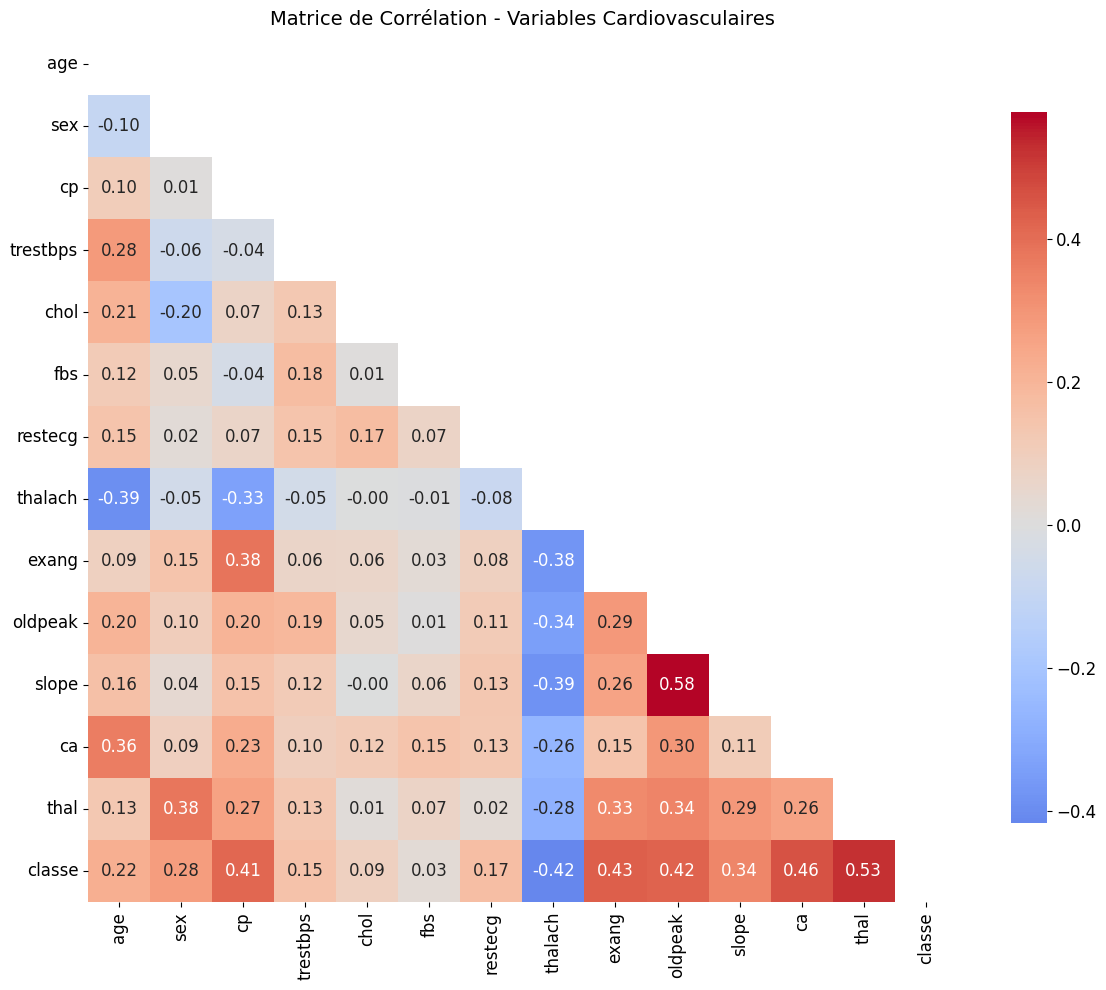

In [10]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
# Garder seulement les colonnes numériques pour la matrice de corrélation
df_num = df.select_dtypes(include='number')
df_num = df_num[[x for x in df_num.columns if x != "label"]]
corr_matrix = df_num.corr()

# Masquer le triangle supérieur
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Créer la heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation - Variables Cardiovasculaires', fontsize=14)
plt.tight_layout()
plt.show()

## Analyse des Facteurs de Risque

In [11]:
# Corrélations avec la maladie cardiaque
print("CORRÉLATIONS AVEC LA MALADIE CARDIAQUE:")
print("=" * 50)

correlations = df_num.corr()['classe'].sort_values(key=abs, ascending=False)

for var, corr in correlations.items():
    if var != 'classe':
        direction = "↗️ (positive)" if corr > 0 else "↘️ (négative)"
        if abs(corr) > 0.3:
            force = "FORTE"
        elif abs(corr) > 0.1:
            force = "modérée"
        else:
            force = "faible"

        print(f"{var:12} : {corr:+.3f} {direction} - corrélation {force}")
        print()

CORRÉLATIONS AVEC LA MALADIE CARDIAQUE:
thal         : +0.526 ↗️ (positive) - corrélation FORTE

ca           : +0.460 ↗️ (positive) - corrélation FORTE

exang        : +0.432 ↗️ (positive) - corrélation FORTE

oldpeak      : +0.425 ↗️ (positive) - corrélation FORTE

thalach      : -0.417 ↘️ (négative) - corrélation FORTE

cp           : +0.414 ↗️ (positive) - corrélation FORTE

slope        : +0.339 ↗️ (positive) - corrélation FORTE

sex          : +0.277 ↗️ (positive) - corrélation modérée

age          : +0.223 ↗️ (positive) - corrélation modérée

restecg      : +0.169 ↗️ (positive) - corrélation modérée

trestbps     : +0.151 ↗️ (positive) - corrélation modérée

chol         : +0.085 ↗️ (positive) - corrélation faible

fbs          : +0.025 ↗️ (positive) - corrélation faible



In [12]:
# Comparaison des moyennes entre patients sains et malades
from scipy import stats

print("COMPARAISON PATIENTS SAINS vs MALADES:")
print("=" * 50)

variables_continues = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in variables_continues:
    sains = df[df['classe'] == 0][var]
    malades = df[df['classe'] == 1][var]
    print(var)
    print(f"  Patients sains    : {sains.mean():.1f} ± {sains.std():.1f}")
    print(f"  Patients malades  : {malades.mean():.1f} ± {malades.std():.1f}")

    difference = malades.mean() - sains.mean()
    print(f"  Différence        : {difference:+.1f}")

    # Test statistique simple (différence significative ?)
    t_stat, p_value = stats.ttest_ind(malades, sains)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"  Significativité   : {significance} (p={p_value:.3f})")

COMPARAISON PATIENTS SAINS vs MALADES:
age
  Patients sains    : 52.6 ± 9.5
  Patients malades  : 56.6 ± 7.9
  Différence        : +4.0
  Significativité   : *** (p=0.000)
trestbps
  Patients sains    : 129.2 ± 16.2
  Patients malades  : 134.6 ± 18.8
  Différence        : +5.3
  Significativité   : ** (p=0.009)
chol
  Patients sains    : 242.6 ± 53.5
  Patients malades  : 251.5 ± 49.5
  Différence        : +8.8
  Significativité   : ns (p=0.139)
thalach
  Patients sains    : 158.4 ± 19.2
  Patients malades  : 139.3 ± 22.6
  Différence        : -19.1
  Significativité   : *** (p=0.000)
oldpeak
  Patients sains    : 0.6 ± 0.8
  Patients malades  : 1.6 ± 1.3
  Différence        : +1.0
  Significativité   : *** (p=0.000)


## Construction d'un Modèle Prédictif

Nous voulons apprendre une fonction (un modèle) M qui prend en entrée les mesures/informations d'un patient et qui prédit si ce patient est soit malade ou a un risque élevé d'une maladie cardiaque.

Pour un individu $x = [age, thal, trestbps, chol, ....]$, le model prédit la variable binaire $M(x) = \hat{y}$ associée au risque de l'individu (le **diagnostic** ou la **classe**).




In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
# Préparation des données pour le modèle
print("🔧 PRÉPARATION DES DONNÉES:")

# Enlever  les valeurs manquantes
df_clean = df.dropna()
df_clean = df_clean.select_dtypes("number")
print(f"Patients après nettoyage: {len(df_clean)} (supprimés: {len(df) - len(df_clean)})")

# Séparer les variables explicatives (X) de la variable cible (y)
X = df_clean.drop(["label", "classe"], axis=1)
y = df_clean['classe']

print(f"Variables explicatives: {X.shape[1]}")
print(f"Échantillons: {X.shape[0]}")
print(f"Cas positifs (maladie): {y.sum()} ({y.mean()*100:.1f}%)")
print(f"Cas négatifs (sains): {(y==0).sum()} ({(y==0).mean()*100:.1f}%)")


🔧 PRÉPARATION DES DONNÉES:
Patients après nettoyage: 297 (supprimés: 6)
Variables explicatives: 13
Échantillons: 297
Cas positifs (maladie): 137 (46.1%)
Cas négatifs (sains): 160 (53.9%)


In [15]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDonnées d'entraînement: {len(X_train)} patients")
print(f"Données de test: {len(X_test)} patients")



Données d'entraînement: 237 patients
Données de test: 60 patients


## Random Forest (Forêt aléatoires)

Un Random Forest est un algorithme d’apprentissage automatique qui combine plusieurs arbres de décision pour faire des prédictions plus fiables. Chaque arbre est entraîné sur un sous-ensemble aléatoire des données et des variables. Les résultats de tous les arbres sont ensuite agrégés (vote ou moyenne), ce qui réduit le surapprentissage et améliore la précision.


### Exemple d'arbre de décision
![decision-tree](https://dv495y1g0kef5.cloudfront.net/single_notebooks/img/binary_decision_tree.png)


### Random Forest = Ensemble d'arbre de décision

![random-forest](https://miro.medium.com/1*R3oJiyaQwyLUyLZL-scDpw.png)


<div style="
  border-left: 6px solid #1a73e8;
  background: #e8f0fe;
  padding: 12px 14px;
  border-radius: 8px;
  font-family: Arial, sans-serif;
  font-size: 14px;
  color: #202124;
">
  📘 <strong>Pour en apprendre plus</strong>, vous pouvez suivre ce tutoriel :
  <a href="https://projeduc.github.io/intro_apprentissage_automatique/arbres.html" target="_blank" rel="noopener noreferrer"
     style="color:#1a73e8; text-decoration: underline;">
    Arbres de décision
  </a>
</div>

In [16]:
# Entraînement du modèle Random Forest
print("ENTRAÎNEMENT DU MODÈLE RANDOM FOREST:")
print("=" * 40)

# Créer et configurer le modèle
modele = RandomForestClassifier(
    n_estimators=100,    # Nombre d'arbres
    max_depth=10,        # Profondeur maximale
    random_state=42,     # Pour la reproductibilité
    min_samples_split=5, # Minimum d'échantillons pour diviser
    min_samples_leaf=2   # Minimum d'échantillons par feuille
)

# Entraîner le modèle
modele.fit(X_train, y_train)

print("Modèle entraîné avec succès!")

ENTRAÎNEMENT DU MODÈLE RANDOM FOREST:
Modèle entraîné avec succès!


## Évaluation des Performances

In [ ]:
# Prédictions sur les ensembles d'entraînement et de test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_train = modele.predict(X_train)
y_pred_test = modele.predict(X_test)

# Calcul des métriques
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

Comparez les performances du model sur l'ensemble d'entrainement à celui du modèle sur les données d'évaluation. Que pouvez vous conclure ?

*Nous avons vu les concepts de surapprentissage (overfitting) et sous apprentissage (underfitting)*

In [ ]:
...

Ellipsis

Calculer la precision et la sensibilité (recall) et le score F1. Complétez le code suivant:

In [ ]:
# Importer tout d'abord les fonctions requises

...

# puis calculer les métriques
precision_test = ...
recall_test = ...
f1_test = ...

In [ ]:
# Rapport de classification détaillé
print("RAPPORT DE CLASSIFICATION DÉTAILLÉ:")
print("=" * 50)
print(classification_report(y_test, y_pred_test,
                          target_names=['Sain', 'Malade']))

RAPPORT DE CLASSIFICATION DÉTAILLÉ:
              precision    recall  f1-score   support

        Sain       0.85      0.91      0.88        32
      Malade       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



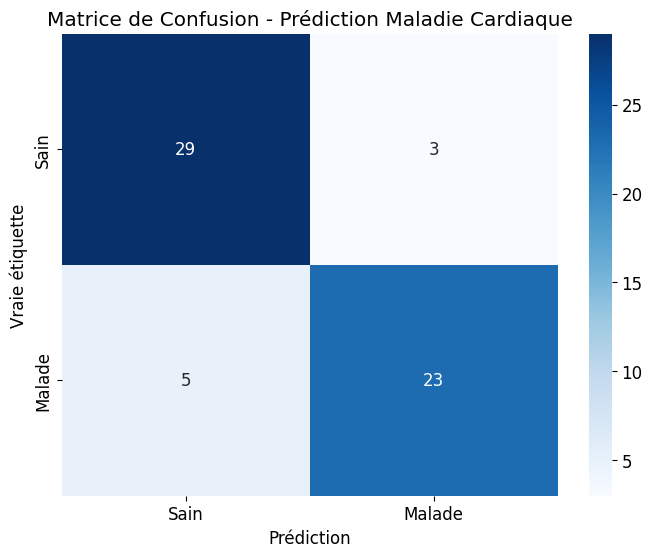

🏥 MÉTRIQUES MÉDICALES:
Sensibilité (Se):     0.821 (82.1%)
Spécificité (Sp):     0.906 (90.6%)
VPP:                  0.885 (88.5%)
VPN:                  0.853 (85.3%)

Interprétation clinique:
• Le modèle détecte 82% des maladies cardiaques (sensibilité)
• Il identifie correctement 91% des patients sains (spécificité)
• 88% des patients prédits malades le sont vraiment (VPP)
• 85% des patients prédits sains le sont vraiment (VPN)


In [ ]:
# Matrice de confusion et métriques médicales
cm = confusion_matrix(y_test, y_pred_test)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sain', 'Malade'],
            yticklabels=['Sain', 'Malade'])
plt.title('Matrice de Confusion - Prédiction Maladie Cardiaque')
plt.ylabel('Vraie étiquette')
plt.xlabel('Prédiction')
plt.show()

# Calcul des métriques médicales
tn, fp, fn, tp = cm.ravel()  # True Neg, False Pos, False Neg, True Pos

sensibilite = tp / (tp + fn)  # Taux de vrais positifs (Recall)
specificite = tn / (tn + fp)  # Taux de vrais négatifs
vpp = tp / (tp + fp)          # Valeur prédictive positive (Precision)
vpn = tn / (tn + fn)          # Valeur prédictive négative

print("🏥 MÉTRIQUES MÉDICALES:")
print("=" * 30)
print(f"Sensibilité (Se):     {sensibilite:.3f} ({sensibilite*100:.1f}%)")
print(f"Spécificité (Sp):     {specificite:.3f} ({specificite*100:.1f}%)")
print(f"VPP:                  {vpp:.3f} ({vpp*100:.1f}%)")
print(f"VPN:                  {vpn:.3f} ({vpn*100:.1f}%)")

print(f"\nInterprétation clinique:")
print(f"• Le modèle détecte {sensibilite*100:.0f}% des maladies cardiaques (sensibilité)")
print(f"• Il identifie correctement {specificite*100:.0f}% des patients sains (spécificité)")
print(f"• {vpp*100:.0f}% des patients prédits malades le sont vraiment (VPP)")
print(f"• {vpn*100:.0f}% des patients prédits sains le sont vraiment (VPN)")

## Importance des Variables

In [ ]:
# Analyser l'importance des caractéristiques
importances = modele.feature_importances_
feature_importance = pd.DataFrame(
    {
        "variable": X.columns,
        "importance": importances,
        "description": [description_dict[col] for col in X.columns],
    }
).sort_values("importance", ascending=False)

print("IMPORTANCE DES VARIABLES MÉDICALES:")
print("=" * 50)
feature_importance

IMPORTANCE DES VARIABLES MÉDICALES:


,variable,importance,description
2,cp,0.156692,"Type de douleur thoracique (0: typique angine,..."
12,thal,0.138874,"Type de thalassémie (3 = normal, 6 = anormal f..."
7,thalach,0.114321,Fréquence cardiaque maximale atteinte (bpm)
9,oldpeak,0.112682,Dépression ST induite par l'effort par rapport...
11,ca,0.110378,Nombre de vaisseaux principaux colorés par flu...
0,age,0.080033,Âge du patient
4,chol,0.074992,Cholestérol sérique (mg/dl)
3,trestbps,0.068651,Pression artérielle au repos (mmHg)
10,slope,0.051874,Pente du segment ST lors de l’effort maximal (...
8,exang,0.038668,"Angine d'effort (1 = oui, 0 = non)"


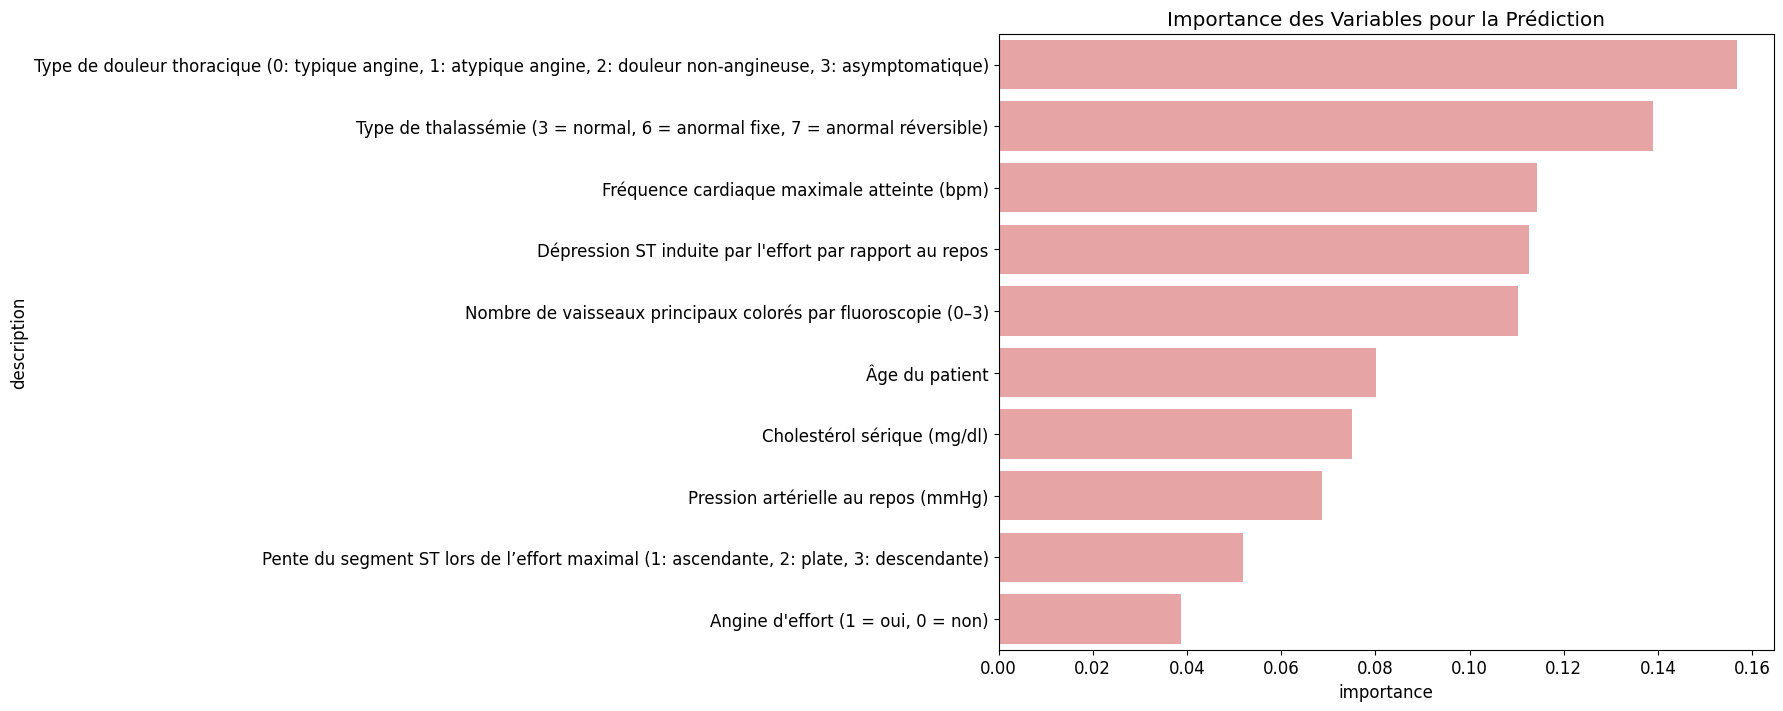

In [ ]:
# Graphique d'importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)
ax = sns.barplot(data=top_features, x="importance", y="description", color="lightcoral", alpha=0.8)
plt.title('Importance des Variables pour la Prédiction')
plt.show()

## Prédictions sur Nouveaux Patients

Nouvelle fonction pour analyzer un nouveau patient

*complétez le code suivant:*

In [ ]:

def predire_risque_cardiaque(age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal, modele=modele):
    """
    Prédire le risque de maladie cardiaque pour un nouveau patient

    Returns:
        dict: Prédiction et probabilité
    """
    # Créer le profil patient
    attributs = ...
    patient = np.array([attributs])
    # Prédiction
    prediction = ...
    probabilites = modele.predict_proba(patient)[0]

    return {
        'prediction': 'Maladie cardiaque' if prediction == 1 else 'Risque faible',
        'probabilite_maladie': probabilites[1] * 100,
    }

In [ ]:
# Patient 1: Homme âgé avec facteurs de risque
patient1 = predire_risque_cardiaque(
    age=65,
    sex=1,
    cp=2,
    trestbps=160,
    chol=300,
    fbs=1,
    restecg=0,
    thalach=120,
    exang=1,
    oldpeak=2.5,
    slope=2,
    ca=2,
    thal=3,
)
print(f"Patient 1 - Homme 65 ans, multiples facteurs de risque:")
print(f"Prédiction: {patient1['prediction']}")
print(f"Probabilité maladie: {patient1['probabilite_maladie']:.1f}%")

In [ ]:
# Patient 2: Femme jeune avec peu de facteurs
patient2 = predire_risque_cardiaque(
    age=35,
    sex=0,
    cp=0,
    trestbps=120,
    chol=200,
    fbs=0,
    restecg=0,
    thalach=180,
    exang=0,
    oldpeak=0.0,
    slope=0,
    ca=0,
    thal=0,
)
print(f"Patient 2 - Femme 35 ans, peu de facteurs de risque:")
print(f"Prédiction: {patient2['prediction']}")
print(f"Probabilité maladie: {patient2['probabilite_maladie']:.1f}%")


In [ ]:
# Patient 3: Cas intermédiaire
patient3 = predire_risque_cardiaque(
    age=50,
    sex=1,
    cp=1,
    trestbps=140,
    chol=240,
    fbs=0,
    restecg=1,
    thalach=150,
    exang=0,
    oldpeak=1.0,
    slope=1,
    ca=1,
    thal=2,
)
print(f"Patient 3 - Homme 50 ans, facteurs de risque modérés:")
print(f"Prédiction: {patient3['prediction']}")
print(f"Probabilité maladie: {patient3['probabilite_maladie']:.1f}%")